In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# 데이터 준비

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 5000)

In [3]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                 random_state = 12)

In [5]:
train_seq = pad_sequences(x_train, maxlen = 100)
val_seq = pad_sequences(x_val, maxlen = 100)
test_seq = pad_sequences(x_test, maxlen = 100)

# 모델 구성

In [7]:
model = keras.Sequential()
model.add(keras.layers.Embedding(5000, 100, input_shape = (100,)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv1D(64, 5, activation = "relu"))
model.add(keras.layers.MaxPool1D(4))
model.add(keras.layers.LSTM(55))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

In [8]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 100)            │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 96, 64)              │          32,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 24, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 55)                  │          26,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              56 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 558,520 (2.13 MB)

 Trainable params: 558,520 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/model-cnnrnn-model.keras",
                                               save_best_only = True)

In [19]:
history = model.fit(train_seq, y_train, batch_size = 128, epochs = 50,
                   validation_data = (val_seq, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.6331 - loss: 0.6110 - val_accuracy: 0.8432 - val_loss: 0.3521
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.8675 - loss: 0.3043 - val_accuracy: 0.8570 - val_loss: 0.3284
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9005 - loss: 0.2448 - val_accuracy: 0.8568 - val_loss: 0.3389
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9225 - loss: 0.2020 - val_accuracy: 0.8518 - val_loss: 0.3555
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9349 - loss: 0.1694 - val_accuracy: 0.8474 - val_loss: 0.3830
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9500 - loss: 0.1373 - val_accuracy: 0.8476 - val_loss: 0.3866


In [20]:
model.evaluate(test_seq, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8552 - loss: 0.3339


[0.32938918471336365, 0.8552799820899963]

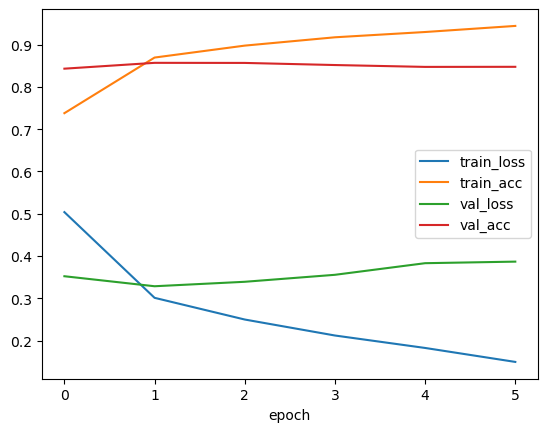

In [21]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()